interactive(children=(IntSlider(value=300000000, description='v1', max=300000000, min=100000000, step=10000000…

<IPython.core.display.Javascript object>


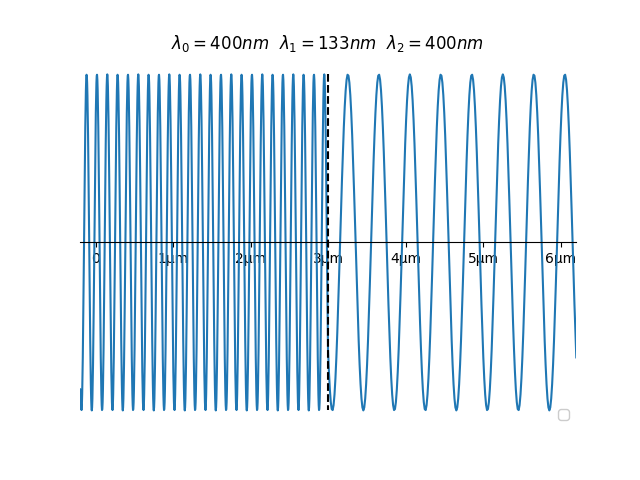

In [54]:
%matplotlib notebook
#En dynamique
from math import cos,pi,sin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, widgets
import numpy as np

x = np.array([-14.4+28.8*i/1600 for i in range(1601)])
y = np.array([sin(2*pi*val/0.6) for val in x])

def calcul(v,l0):
    return l0*v/3e8
    
    
@interact(v1=(100000000,300000000,10000000),v2=(100000000,300000000,10000000),lambda0=(400,800,1))
def setv(v1=3.0e8,v2=2.0e8,lambda0=600):
    global x,l1,l2,l0
    l1 = calcul(v1,lambda0)
    l2 = calcul(v2,lambda0)
    l0 = lambda0
    x[:800] = np.array([-24*l1/1000+24*l1*i/800000 for i in range(800)])
    x[801:] = np.array([24*l2*i/800000 for i in range(1,801)])




fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
fig.show()

dt = 100

def anime(i):
    global x,y,l1,l2,l0
    y[:2],y[2:] = y[-2:],y[:-2]

    ax1.clear()
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['left'].set_color('none')
    ax1.spines['bottom'].set_position(('data',0))
    ax1.spines['left'].set_position(('data',0))
    ax1.xaxis.set_ticks_position('bottom')
   
  
    ax1.set_xlim([-3.2,3.2])
    ax1.set_ylim([-1.1,1.1])#[min(-0.025,li-1.05*xm),li+1.05*xm])
    ax1.set_xticks([-3,-2,-1,0,1,2,3])
    ax1.set_xticklabels(["0","1µm","2µm","3µm","4µm","5µm","6µm"])
    ax1.set_yticks([]) 
    ax1.plot(x,y)
    ax1.set_title("$\lambda_0={:.0f}nm\ \ \lambda_1={:.0f}nm\ \ \lambda_2={:.0f}nm$".format(l0,l1,l2))
    ax1.plot([0,0],[1,-1],"--",color="k")
  
    ax1.legend(framealpha=1.)

    
    
simulation=animation.FuncAnimation(fig,anime,interval=dt)